#  clustering notes with k-means and Hierarchical 

## hierarchical clustering

Hierarchical clustering is unsupervised learning algorithm that is used to group together the unlabeled data points having similar characteristics. Hierarchical clustering algorithms falls into following two categories.

Agglomerative hierarchical algorithms − In agglomerative hierarchical algorithms, each data point is treated as a single cluster and then successively merge or agglomerate (bottom-up approach) the pairs of clusters. The hierarchy of the clusters is represented as a dendrogram or tree structure.

Divisive hierarchical algorithms − On the other hand, in divisive hierarchical algorithms, all the data points are treated as one big cluster and the process of clustering involves dividing (Top-down approach) the one big cluster into various small clusters

importing libaries 

In [24]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [44]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


point in three dimensional ways

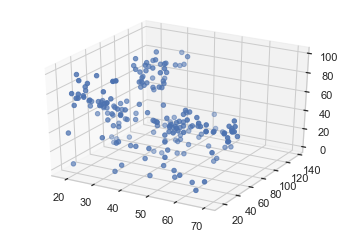

In [26]:
sns.set(style = "whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

ax.scatter(x, y, z)

plt.show()

In [39]:
x=df.iloc[:,3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

Visualization the hiereachy ways 

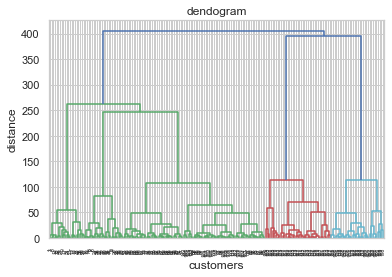

In [40]:
import scipy.cluster.hierarchy as ach
dendogram=ach.dendrogram(ach.linkage(x,method='ward'))
plt.title('dendogram')
plt.xlabel('customers')
plt.ylabel('distance')
plt.show()

In [41]:
from sklearn.cluster import AgglomerativeClustering
hc= AgglomerativeClustering(n_clusters=5 ,affinity ='euclidean',linkage='ward')
hist=hc.fit(x)
hist

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5)

In [42]:
y1=hc.fit_predict(x)
y1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

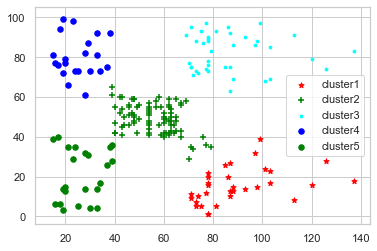

In [43]:
plt.scatter(x[y1==0,0],x[y1==0,1],s=30,color='red',label='cluster1',marker='*')
plt.scatter(x[y1==1,0],x[y1==1,1],s=30,color='green',label='cluster2',marker='+')
plt.scatter(x[y1==2,0],x[y1==2,1],s=30,color='cyan',label='cluster3',marker='.')
plt.scatter(x[y1==3,0],x[y1==3,1],s=30,color='blue',label='cluster4')
plt.scatter(x[y1==4,0],x[y1==4,1],s=30,color='green',label='cluster5')
plt.legend()
plt.show()

## k means clustering 

K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning. K-Means performs division of objects into clusters that share similarities and are dissimilar to the objects belonging to another cluster. 

The term ‘K’ is a number. You need to tell the system how many clusters you need to create. For example, K = 2 refers to two clusters. There is a way of finding out what is the best or optimum value of K for a given data. 

For a better understanding of k-means, let's take an example from cricket. Imagine you received data on a lot of cricket players from all over the world, which gives information on the runs scored by the player and the wickets taken by them in the last ten matches. Based on this information, we need to group the data into two clusters, namely batsman and bowlers. 

importing same libaries . 

### elbow method

 elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and then for each value of k computes an average score for all clusters. By default, the distortion score is computed, the sum of square distances from each point to its assigned center

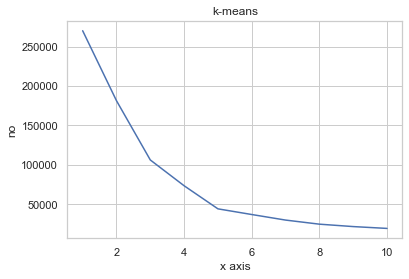

In [58]:
from sklearn.cluster import KMeans
wcss =[]
for i in range(1,11):
    kmeans =KMeans(n_clusters = i, init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('k-means')
plt.xlabel('x axis')
plt.ylabel('no')
plt.show()

In [65]:
kmeans= KMeans(n_clusters=5 , init='k-means++')
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
y2=kmeans.fit_predict(x)
y2

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

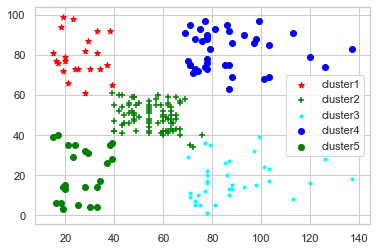

In [67]:
plt.scatter(x[y2==0,0],x[y2==0,1],color='red',label='cluster1',marker='*')
plt.scatter(x[y2==1,0],x[y2==1,1],color='green',label='cluster2',marker='+')
plt.scatter(x[y2==2,0],x[y2==2,1],color='cyan',label='cluster3',marker='.')
plt.scatter(x[y2==3,0],x[y2==3,1],color='blue',label='cluster4')
plt.scatter(x[y2==4,0],x[y2==4,1],color='green',label='cluster5')
plt.legend()
plt.show()